In [8]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
import seaborn as sns
import pickle
%matplotlib inline
%jsroot on

In [9]:
#pion_data = pd.read_pickle("combined_data_pion_shuffled_02.pkl")
#pion_data

In [10]:
#positron_data = pd.read_pickle("combined_data_positron_shuffled_02.pkl")
#positron_data

In [11]:
req_features = ["NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y", "beamEnergy", "particle" ]

In [12]:
#features = pd.concat([pion_data[req_features], positron_data[req_features]])
#features = features.sample(frac=1)
#features

In [13]:
data = pd.read_pickle("new_combined_data_for_DT.pkl")
data

,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,trueBeamEnergy,particle
877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,197.320007,positron
838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,197.320007,positron
68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,19.950222,pion
913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,287.179993,positron
913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,287.179993,positron
...,...,...,...,...,...,...,...,...,...
881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,197.320007,positron
418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,301.545776,pion
583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,20.000000,positron
12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,20.054062,pion


In [14]:
features = data[req_features]
features

,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,positron
838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,positron
68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,pion
913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,positron
913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,positron
...,...,...,...,...,...,...,...,...
881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,positron
418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,pion
583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,positron
12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,pion


In [15]:
features.loc[features.rechit_energy_Hcal_by_Ecal>1000000]

,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
537435,90,0.0,345.212573,inf,2.340217,3.550656,20.0,positron
511866,89,0.0,377.767887,inf,4.852741,11.782488,20.0,positron
518606,100,0.0,429.282147,inf,2.649976,2.662088,20.0,positron
499536,87,0.0,419.225328,inf,2.784415,3.025332,20.0,positron
512564,92,0.0,441.091150,inf,3.567783,3.514061,20.0,positron
...,...,...,...,...,...,...,...,...
584971,88,0.0,390.987509,inf,2.989940,2.651484,20.0,positron
321734,1,0.0,0.805625,inf,0.000000,0.000000,200.0,pion
580013,116,0.0,518.649472,inf,2.934713,3.252982,20.0,positron
570484,95,0.0,410.215643,inf,3.363551,2.800605,20.0,positron


In [16]:
features.drop(list(features.loc[features.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)

/home/nitish/.local/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
features.reset_index(inplace=True)
features

,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
0,877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,positron
1,838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,positron
2,68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,pion
3,913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,positron
4,913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,positron
...,...,...,...,...,...,...,...,...,...
967178,881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,positron
967179,418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,pion
967180,583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,positron
967181,12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,pion


In [18]:
features.loc[(features.beamEnergy==300) & (features.particle=="positron")]

,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
3,913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,positron
4,913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,positron
5,905723,1208,29627.666543,12.774979,0.000431,2.751183,2.670946,300.0,positron
18,908452,1175,29761.138451,21.565568,0.000725,2.693206,2.771344,300.0,positron
21,913843,1116,29352.693809,9.643354,0.000329,2.569881,2.631460,300.0,positron
...,...,...,...,...,...,...,...,...,...
967132,930618,1185,29059.550251,27.289648,0.000939,2.618064,2.675267,300.0,positron
967133,913646,1059,28066.927649,48.725171,0.001736,2.716968,2.831135,300.0,positron
967155,960084,1160,29267.267353,28.687029,0.000980,2.623780,2.635334,300.0,positron
967166,964237,1159,29733.902702,28.067432,0.000944,2.586926,2.838947,300.0,positron


In [19]:
train_size = 967183*0.5
test_size = 967183*0.25

print(train_size)
test_size

483591.5


241795.75

In [20]:
train_data = features.loc[:train_size,:]
train_data

,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
0,877301,891,19975.788540,18.506620,0.000926,2.536491,2.631042,200.0,positron
1,838258,976,20638.333755,7.480501,0.000362,2.525404,2.569785,200.0,positron
2,68595,140,850.470873,71.280923,0.083813,3.070626,2.235369,20.0,pion
3,913575,1254,30505.780848,39.051176,0.001280,2.785564,2.728184,300.0,positron
4,913415,1080,30189.021337,28.169815,0.000933,2.745438,2.676203,300.0,positron
...,...,...,...,...,...,...,...,...,...
483587,483527,1334,11657.409969,1598.134929,0.137092,3.926770,4.290120,300.0,pion
483588,836230,1038,20356.641203,11.075590,0.000544,2.577749,2.823984,200.0,positron
483589,662260,421,5197.120244,1.123164,0.000216,2.086594,2.071683,50.0,positron
483590,175297,446,2547.780438,150.210045,0.058957,3.453589,3.530860,50.0,pion


In [21]:
train_data.particle.value_counts()

pion        248745
positron    234847
Name: particle, dtype: int64

In [22]:
train_data.loc[train_data.particle=="positron"].beamEnergy.value_counts()

20.0     49224
200.0    49057
50.0     48683
100.0    48187
300.0    39696
Name: beamEnergy, dtype: int64

In [23]:
train_data.loc[train_data.particle=="pion"].beamEnergy.value_counts()

300.0    49985
50.0     49796
100.0    49682
200.0    49644
20.0     49638
Name: beamEnergy, dtype: int64

In [24]:
ene = [20, 50, 100, 200, 300]
train_ene_count_positron = [49224, 48683, 48187, 49057, 39696]
train_ene_count_pion = [49638, 49796, 49682, 49644, 49985]

In [25]:
c=ROOT.TCanvas()

H_pion = ROOT.TH1F("H_pion","Training Data;Energy (GeV); Number of Samples",32,5,325)
H_positron = ROOT.TH1F("H_positron","Training Data;Energy (GeV); Number of Samples",32,5,325)

for i in range(5):
    H_pion.SetBinContent(int(ene[i]/10), train_ene_count_pion[i])
    H_positron.SetBinContent(int(ene[i]/10), train_ene_count_positron[i])
    
    
H_pion.Draw()
H_positron.Draw("same")

H_positron.SetLineColor(3)

H_pion.SetFillColor(4)
H_positron.SetFillColor(3)

#H_pion.SetFillStyle(3000)
#H_positron.SetFillStyle(3000)

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (248745 samples)","h");
legend.AddEntry("H_positron","Positron (234847 samples)","h");
legend.Draw();

c.Draw()

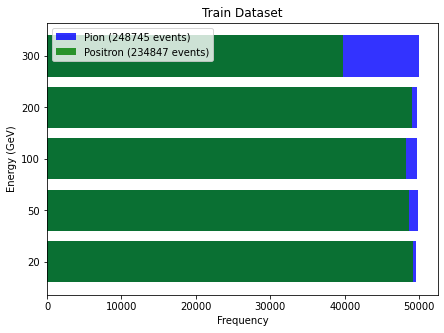

In [26]:
plt.figure(figsize=[7,5])

plt.barh([str(i) for i in ene], train_ene_count_pion, color="blue", label="Pion (248745 events)", alpha=0.8)
plt.barh([str(i) for i in ene], train_ene_count_positron, color="green", label="Positron (234847 events)", alpha=0.8)

plt.xlabel("Frequency")
plt.ylabel("Energy (GeV)")
plt.title("Train Dataset")

plt.legend(loc="upper left")

In [27]:
dev_data = features.loc[train_size:(train_size+test_size),:]
dev_data

,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
483592,557547,221,2183.358641,0.000000,0.000000,1.822181,2.031263,20.0,positron
483593,574774,243,1938.652900,12.173349,0.006279,1.854894,2.479655,20.0,positron
483594,542815,247,2058.342930,0.000000,0.000000,2.035518,1.955965,20.0,positron
483595,413907,1371,6715.812685,2189.675702,0.326048,4.086661,4.676969,300.0,pion
483596,506675,209,2028.391996,7.256135,0.003577,1.990371,1.847183,20.0,positron
...,...,...,...,...,...,...,...,...,...
725383,94203,196,833.390792,38.329681,0.045992,3.178535,2.979788,20.0,pion
725384,888450,1185,29887.418795,27.318452,0.000914,2.732532,2.835051,300.0,positron
725385,331023,1043,16136.984286,622.769840,0.038593,3.073395,2.773386,200.0,pion
725386,166598,322,1813.753698,244.009899,0.134533,3.617026,2.969481,50.0,pion


In [28]:
test_data = features.loc[(train_size+test_size):,:]
test_data

,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle
725388,517368,217,1984.557709,0.000000,0.000000,1.822600,1.892882,20.0,positron
725389,259913,854,5966.998395,383.103349,0.064204,3.264040,3.319935,100.0,pion
725390,523761,249,1983.272591,0.000000,0.000000,2.028838,1.821323,20.0,positron
725391,145650,140,45.921891,287.344803,6.257251,4.752668,3.622811,50.0,pion
725392,505873,230,1936.153578,0.000000,0.000000,1.942866,1.907020,20.0,positron
...,...,...,...,...,...,...,...,...,...
967178,881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,positron
967179,418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,pion
967180,583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,positron
967181,12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,pion


In [51]:
#X_train = train_data[[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values

features_list = [ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal",  "std_x", "std_y" ]
#features_list = [ "NRechits", "rechit_energy_Hcal_by_Ecal",  "std_x", "std_y" ]


X_train = train_data[features_list].values
X_train

array([[8.91000000e+02, 1.99757885e+04, 1.85066202e+01, 2.53649092e+00,
        2.63104177e+00],
       [9.76000000e+02, 2.06383338e+04, 7.48050082e+00, 2.52540374e+00,
        2.56978488e+00],
       [1.40000000e+02, 8.50470873e+02, 7.12809232e+01, 3.07062578e+00,
        2.23536873e+00],
       ...,
       [4.21000000e+02, 5.19712024e+03, 1.12316442e+00, 2.08659387e+00,
        2.07168317e+00],
       [4.46000000e+02, 2.54778044e+03, 1.50210045e+02, 3.45358872e+00,
        3.53086019e+00],
       [4.29000000e+02, 5.24415261e+03, 0.00000000e+00, 2.17538500e+00,
        2.14739609e+00]])

In [52]:
y_train = train_data.particle.values
y_train

array(['positron', 'positron', 'pion', ..., 'positron', 'pion',
       'positron'], dtype=object)

In [53]:
X_dev = dev_data[features_list].values
X_test = test_data[features_list].values

y_dev = dev_data.particle.values
y_test = test_data.particle.values

In [32]:
#from sklearn.model_selection import train_test_split

In [33]:
#X_train, X_dt, y_train, y_dt = train_test_split( X, y, test_size=0.5, random_state=3)
#X_dev, X_test, y_dev, y_test = train_test_split( X_dt, y_dt, test_size=0.5, random_state=3)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Dev set:', X_dev.shape,  y_dev.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [55]:
no_of_depths=20

ac_dev=[]
ac_train=[]

for d in range(1,no_of_depths+1):
    model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=d, min_samples_leaf=10, min_samples_split=20).fit(X_train, y_train)
    yhat=model_DT.predict(X_dev)
    ac_dev.append(metrics.accuracy_score(y_dev,yhat))
    
    yhat=model_DT.predict(X_train)
    ac_train.append(metrics.accuracy_score(y_train,yhat))
    
print((ac_dev))
print(len(ac_dev))
print("max accuracy = ", max(ac_dev))
print("The best depth = ", ac_dev.index(max(ac_dev))+1)

[0.9246224089728532, 0.9760831444688911, 0.981244520174031, 0.9849377160912505, 0.988585419113633, 0.9887301692335688, 0.9901156346672402, 0.9904464920842363, 0.9906822279938461, 0.9906243279458717, 0.9905581564624725, 0.9903720491654122, 0.9902024847392017, 0.9900742774901157, 0.9900577346192658, 0.9899543416764546, 0.9898964416284802, 0.9898261344273686, 0.989784777250244, 0.9897640986616818]
20
max accuracy =  0.9906822279938461
The best depth =  9


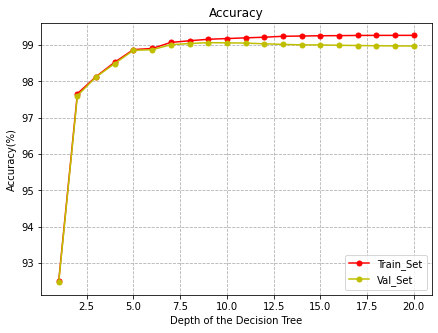

In [56]:
plt.figure(figsize=[7,5])

plt.plot([i for i in range(1,21)], np.array(ac_train)*100, "r.",linestyle="-",  markersize=10, label="Train_Set")
plt.plot([i for i in range(1,21)], np.array(ac_dev)*100, "y.",linestyle="-",  markersize=10, label="Val_Set")

plt.title("Accuracy")
plt.xlabel("Depth of the Decision Tree")
plt.ylabel("Accuracy(%)")
#plt.xticks(ticks=[4*i for i in range(1,21)])
plt.legend()
plt.grid(linestyle='--')
plt.show()

In [58]:
model_D_T = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_leaf=10, min_samples_split=20).fit(X_train, y_train)
yp_train=model_D_T.predict(X_train)
yp_dev=model_D_T.predict(X_dev)
yp_test=model_D_T.predict(X_test)
print("Accuracy of Train set = ", metrics.accuracy_score(y_train,yp_train)*100)
print("Accuracy of Val set = ", metrics.accuracy_score(y_dev,yp_dev)*100)
print("Accuracy of Test set = ", metrics.accuracy_score(y_test,yp_test)*100)

Accuracy of Train set =  99.16106966202915
Accuracy of Val set =  99.06739565584212
Accuracy of Test set =  99.05415744742447


In [59]:
model_D_T.feature_importances_

array([0.02778003, 0.2659109 , 0.69892231, 0.00489513, 0.00249163])

<BarContainer object of 5 artists>

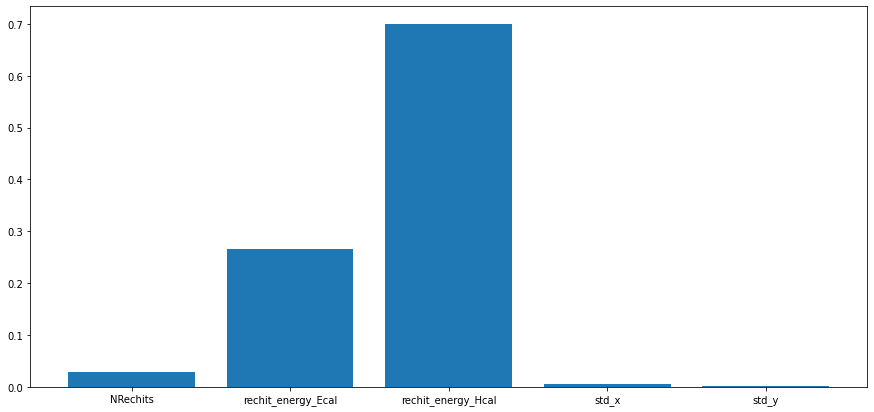

In [60]:
plt.figure(figsize=[15,7])
plt.bar(features_list, model_D_T.feature_importances_)

In [40]:
print("F1_score of Train set = ", metrics.f1_score(y_train,yp_train, pos_label="pion")*100)
print("F1_score of Val set = ", metrics.f1_score(y_dev,yp_dev, pos_label="pion")*100)
print("F1_score of Test set = ", metrics.f1_score(y_test,yp_test, pos_label="pion")*100)

F1_score of Train set =  99.24212221886641
F1_score of Val set =  99.03876019023109
F1_score of Test set =  99.03594889483882


In [41]:
from sklearn_porter import Porter

porter = Porter(model_D_T, language='c')
output = porter.export()

print(output)

/home/nitish/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/nitish/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.weight_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/nitish/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be 

#include <stdlib.h>
#include <stdio.h>
#include <math.h>

#define N_FEATURES 6
#define N_CLASSES 2

int lChilds[1913] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 13, -1, -1, -1, 17, -1, -1, 20, 21, 22, -1, -1, -1, -1, 27, 28, 29, -1, -1, -1, -1, 34, -1, 36, 37, 38, 39, -1, -1, 42, -1, -1, 45, -1, 47, 48, 49, -1, 51, -1, -1, -1, -1, 56, 57, -1, -1, 60, -1, 62, -1, 64, 65, 66, -1, -1, 69, -1, -1, 72, -1, -1, 75, 76, 77, 78, 79, -1, -1, -1, 83, 84, -1, -1, 87, -1, 89, -1, -1, 92, 93, 94, -1, -1, -1, 98, 99, 100, -1, -1, -1, 104, 105, -1, -1, -1, 109, 110, 111, 112, 113, -1, -1, -1, 117, 118, -1, 120, -1, -1, 123, 124, -1, 126, -1, -1, -1, -1, 131, 132, 133, 134, -1, -1, 137, 138, -1, -1, -1, 142, 143, 144, -1, -1, -1, -1, 149, 150, -1, 152, 153, 154, 155, -1, -1, 158, -1, -1, -1, -1, 163, -1, 165, 166, 167, -1, 169, -1, -1, -1, 173, -1, -1, 176, 177, 178, 179, 180, 181, 182, -1, -1, 185, 186, 187, 188, -1, -1, 191, -1, -1, 194, -1, 196, -1, -1, 199, 200, 201, -1, -1, -1, 205, 206, -1, -1, -

/home/nitish/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)


In [42]:
#import emlearn

#cmodel = emlearn.convert(model_D_T, method="inline")
#cmodel.save(file="DT_Classifier.h")

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode DT_Classifier_nodes[958] = {\n  { 3, 0.007536612451076508, 1, 548 },\n  { 1, 1765.0510864257812, 2, 90 },\n  { 1, 1602.7716674804688, 3, 40 },\n  { 0, 170.5, 4, 20 },\n  { 1, 1304.3853149414062, 5, 17 },\n  { 5, 2.3034026622772217, 6, 14 },\n  { 0, 148.5, 7, 13 },\n  { 2, 4.29845118522644, 8, 10 },\n  { 4, 2.150407552719116, 9, 11 },\n  { 1, 333.82794189453125, 10, 10 },\n  { -1, 1, -1, -1 },\n  { 3, 0.002467565704137087, 12, 12 },\n  { -1, 0, -1, -1 },\n  { 3, 0.0022254595533013344, 12, 12 },\n  { 1, 1181.5868530273438, 15, 12 },\n  { 5, 2.4300968647003174, 16, 12 },\n  { 2, 2.713816523551941, 12, 12 },\n  { 5, 2.412270665168762, 18, 12 },\n  { 3, 0.002504282514564693, 19, 10 },\n  { 4, 2.07649827003479, 10, 10 },\n  { 1, 1289.703857421875, 12, 21 },\n  { 0, 211.5, 22, 31 },\n  { 5, 2.081847071647644, 23, 26 },\n  { 0, 196.0, 24, 25 },\n  { 4, 2.1423169374465942, 10, 12 },\n  { 3

Text(0.5, 1.0, 'Confusion Matrix')

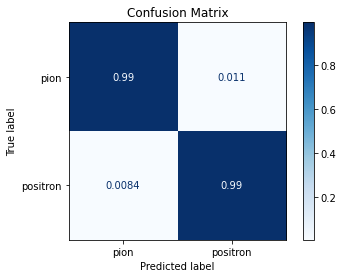

In [33]:
cm = metrics.plot_confusion_matrix(model_D_T, X_test, y_test, normalize="true", cmap=plt.cm.Blues)
cm.ax_.set_title("Confusion Matrix")

In [34]:
yp_test

array(['positron', 'pion', 'positron', ..., 'positron', 'pion',
       'positron'], dtype=object)

In [35]:
(list(y_test[y_test!=yp_test]).count("pion")/y_test.size)*100

0.5897557848590749

In [36]:
(list(y_test[y_test!=yp_test]).count("positron")/y_test.size)*100

0.4069563059616617

In [84]:
from sklearn import tree
import graphviz

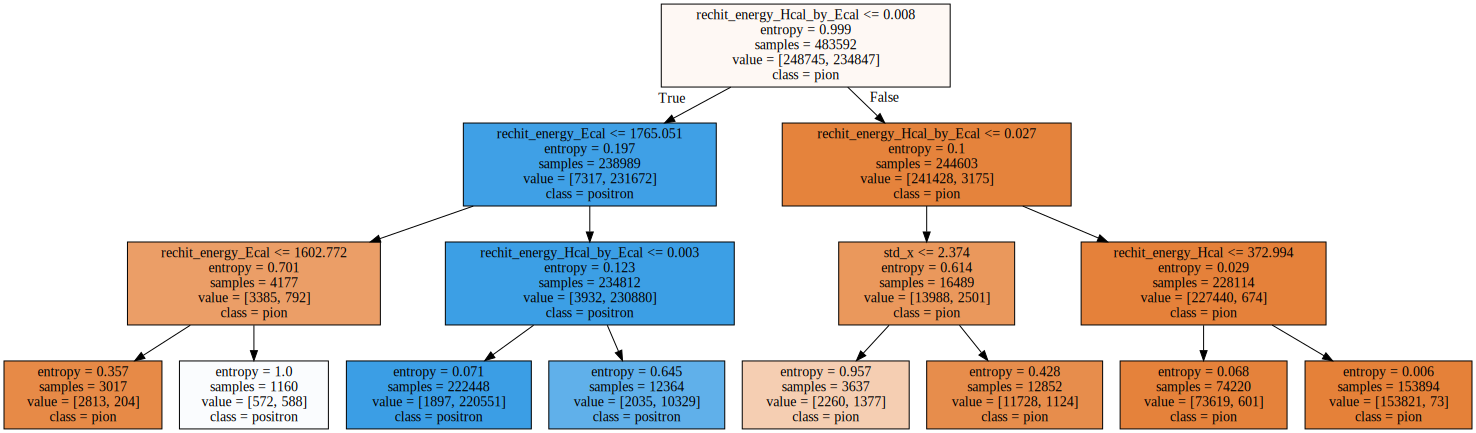

In [106]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=10, min_samples_split=20).fit(X_train, y_train)
model_img = tree.export_graphviz(model, out_file=None, 
                                feature_names=features_list,  
                                class_names=["pion","positron"],
                                filled=True)

graph = graphviz.Source(model_img, format="png") 
graph

In [51]:
graph.render("PID_DT_combined_energy")

'PID_DT_combined_energy.png'

In [37]:
test_data["prediction"] = yp_test
test_data

<ipython-input-37-1bfe7a3d7f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["prediction"] = yp_test


,index,NRechits,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,beamEnergy,particle,prediction
725388,517368,217,1984.557709,0.000000,0.000000,1.822600,1.892882,20.0,positron,positron
725389,259913,854,5966.998395,383.103349,0.064204,3.264040,3.319935,100.0,pion,pion
725390,523761,249,1983.272591,0.000000,0.000000,2.028838,1.821323,20.0,positron,positron
725391,145650,140,45.921891,287.344803,6.257251,4.752668,3.622811,50.0,pion,pion
725392,505873,230,1936.153578,0.000000,0.000000,1.942866,1.907020,20.0,positron,positron
...,...,...,...,...,...,...,...,...,...,...
967178,881004,1032,20810.932168,10.715009,0.000515,2.558075,2.546176,200.0,positron,positron
967179,418926,1477,14098.186081,2055.257028,0.145782,3.772751,3.566276,300.0,pion,pion
967180,583650,245,2267.536542,0.000000,0.000000,2.013368,1.999432,20.0,positron,positron
967181,12683,234,1115.737512,2.509636,0.002249,2.402497,1.946230,20.0,pion,pion


In [38]:
from sklearn.metrics import f1_score, accuracy_score

In [39]:
test_data.loc[test_data.beamEnergy==20].particle.values

array(['positron', 'positron', 'positron', ..., 'pion', 'positron',
       'pion'], dtype=object)

[97.62019134542253, 99.0577606998324, 99.44010098542226, 99.44864908854166, 99.5317995474809]
[97.62109601648625, 99.06557210905036, 99.44937228440422, 99.45460765964299, 99.58029600176718]


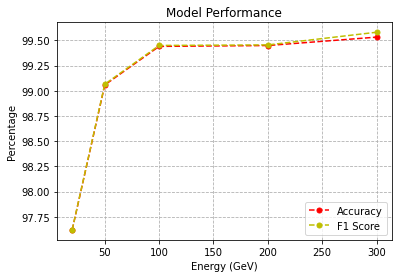

In [42]:
test_accuracy = [(metrics.accuracy_score(test_data.loc[test_data.beamEnergy==i].particle.values, test_data.loc[test_data.beamEnergy==i].prediction.values)*100) for i in ene]
print(test_accuracy)


test_f1_score = [(f1_score(test_data.loc[test_data.beamEnergy==i].particle.values, test_data.loc[test_data.beamEnergy==i].prediction.values, pos_label="pion", average='binary')*100) for i in ene]
print(test_f1_score)

plt.plot(ene, test_accuracy, "b.", label="Accuracy",linestyle="--", color="r", markersize=10)
plt.plot(ene, test_f1_score, "b.", label="F1 Score", linestyle="--", color="y", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Percentage")
plt.title("Model Performance")

plt.grid(linestyle='--')
plt.legend()
plt.show()

In [89]:
(list(y_test[y_test!=yp_test]).count("pion")/list(y_test).count("pion"))*100

1.1429030057385932

[2.47061645478532, 1.2327216878182847, 0.767202109805802, 0.7551110575571354, 0.4896452078985391]
[2.2887606220939554, 0.6450545815415151, 0.34454130344541306, 0.34219748505462794, 0.4411093647011104]


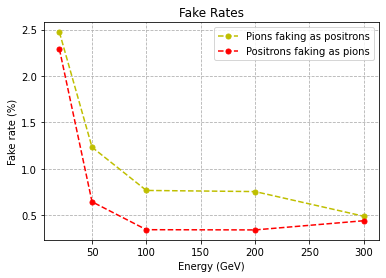

In [43]:
pions_faking_as_positrons = [(list(test_data.loc[test_data.beamEnergy==i].particle.values[test_data.loc[test_data.beamEnergy==i].particle.values!=test_data.loc[test_data.beamEnergy==i].prediction.values]).count("pion")/list(test_data.loc[test_data.beamEnergy==i].particle.values).count("pion"))*100 for i in ene]
print(pions_faking_as_positrons)

positrons_faking_as_pions = [(list(test_data.loc[test_data.beamEnergy==i].particle.values[test_data.loc[test_data.beamEnergy==i].particle.values!=test_data.loc[test_data.beamEnergy==i].prediction.values]).count("positron")/list(test_data.loc[test_data.beamEnergy==i].particle.values).count("positron"))*100 for i in ene]
print(positrons_faking_as_pions)

plt.plot(ene, pions_faking_as_positrons, "b.", label="Pions faking as positrons",  linestyle="--", color="y", markersize=10)
plt.plot(ene, positrons_faking_as_pions, "b.",  label="Positrons faking as pions", linestyle="--", color="r", markersize=10)

plt.xlabel("Energy (GeV)")
plt.ylabel("Fake rate (%)")
plt.title("Fake Rates")

plt.grid(linestyle='--')
plt.legend()
plt.show()

Text(0.5, 1.0, '20 GeV')

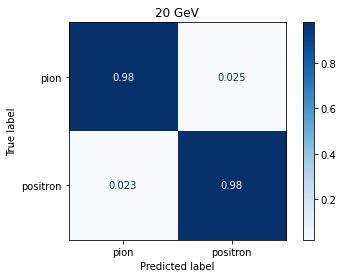

In [81]:
xx = test_data.loc[test_data.beamEnergy==20][[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values
yy = test_data.loc[test_data.beamEnergy==20].particle.values

cm = metrics.plot_confusion_matrix(model_D_T, xx, yy, normalize="true", cmap=plt.cm.Blues)
cm.ax_.set_title("20 GeV")

Text(0.5, 1.0, '50 GeV')

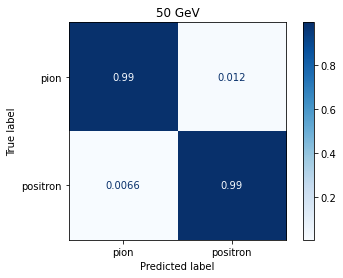

In [82]:
xx = test_data.loc[test_data.beamEnergy==50][[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values
yy = test_data.loc[test_data.beamEnergy==50].particle.values

cm = metrics.plot_confusion_matrix(model_D_T, xx, yy, normalize="true", cmap=plt.cm.Blues)
cm.ax_.set_title("50 GeV")

Text(0.5, 1.0, '100 GeV')

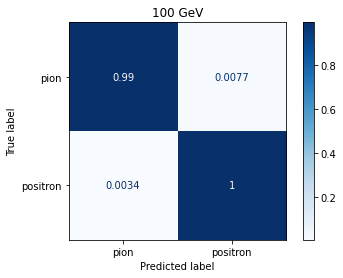

In [83]:
xx = test_data.loc[test_data.beamEnergy==100][[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values
yy = test_data.loc[test_data.beamEnergy==100].particle.values

cm = metrics.plot_confusion_matrix(model_D_T, xx, yy, normalize="true", cmap=plt.cm.Blues)
cm.ax_.set_title("100 GeV")

Text(0.5, 1.0, '200 GeV')

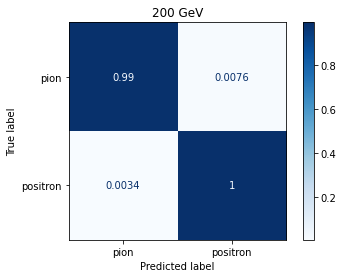

In [84]:
xx = test_data.loc[test_data.beamEnergy==200][[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values
yy = test_data.loc[test_data.beamEnergy==200].particle.values

cm = metrics.plot_confusion_matrix(model_D_T, xx, yy, normalize="true", cmap=plt.cm.Blues)
cm.ax_.set_title("200 GeV")

Text(0.5, 1.0, '300 GeV')

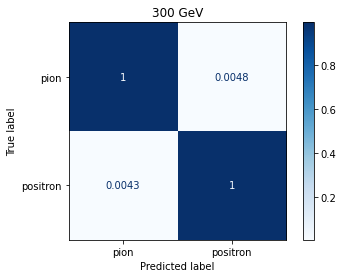

In [85]:
xx = test_data.loc[test_data.beamEnergy==300][[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values
yy = test_data.loc[test_data.beamEnergy==300].particle.values

cm = metrics.plot_confusion_matrix(model_D_T, xx, yy, normalize="true", cmap=plt.cm.Blues)
cm.ax_.set_title("300 GeV")

In [14]:
pion_data.drop(list(pion_data.loc[pion_data.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)
pion_data

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
28355,8455,50.0,49.949471,232,"[1, 2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10, 1...","[-0.9717636, -0.9717636, -0.9717636, 0.0, -0.9...","[2.80524, 2.80524, 1.683144, 5.61048, 2.80524,...","[13.8775, 14.7675, 14.7675, 16.7825, 16.7825, ...","[-3, -3, -2, -5, -3, -3, -3, -2, -3, -3, -3, -...","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, -1, 1,...",...,0,0.000000,pion,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, ...","[2.381936550140381, 2.4305286407470703, 9.5968...",82.057312,641.301300,7.815285,4.658666,4.039524
37061,17161,20.0,19.867395,113,"[1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.122096, 0.0, 0.0, 0.0, ...","[13.8775, 14.7675, 16.7825, 17.6725, 17.6725, ...","[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,2,7.089342,pion,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.1058409214019775, 1.1166751384735107, 1.151...",42.963286,276.104002,6.426510,3.149455,4.186362
95054,15451,200.0,199.064697,1035,"[1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[-1.9435272, -1.9435272, -0.9717636, -1.943527...","[2.244192, 2.244192, -0.561048, 2.244192, 2.24...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[-3, -3, 0, -3, -3, -3, -1, -4, -3, -2, -4, -2...","[2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 3, 3, -4, -3, -...",...,100,245.701767,pion,"[1, 1, 2, 1, 11, 14, 16, 19, 20, 32, 27, 33, 4...","[0.8060534000396729, 0.97751384973526, 5.12017...",12524.166114,828.249238,0.066132,3.343437,3.485708
43688,3887,100.0,99.431160,438,"[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 1.683144, 1.683144, 1.683144, 1.683...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -3, -2, -2, -2, -2, -...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, ...",...,23,110.570976,pion,"[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1.4067063331604004, 0.9108871221542358, 1.299...",3457.063303,860.086294,0.248791,3.442350,3.685568
87695,8092,20.0,20.146393,120,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,6,33.016014,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.2860832214355469, 1.9425948858261108, 0.862...",78.998617,293.039062,3.709420,4.272814,3.873026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27823,7923,300.0,298.845581,1077,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, ...",...,269,799.881287,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 4, ...","[1.3581607341766357, 0.8177338242530823, 0.625...",13286.590371,1787.106152,0.134504,4.191213,4.102881
1099,1100,100.0,100.154640,575,"[1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 1...","[-1.9435272, -0.9717636, -1.9435272, -5.830581...","[2.244192, 1.683144, 2.244192, 0.0, 1.683144, ...","[13.8775, 14.7675, 14.7675, 14.7675, 16.7825, ...","[-3, -2, -3, -3, -2, -2, -2, -2, -2, -2, -2, -...","[2, 1, 2, 6, 1, 1, 1, 1, 1, 1, 1, -1, 1, 2, 3,...",...,0,0.000000,pion,"[1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 2, 8, 10,...","[0.890269935131073, 3.9279664158821106, 4.9102...",7704.643537,226.835743,0.029441,2.930243,2.806214
983

In [19]:
pred_pion_data = model_D_T.predict(pion_data[[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values)
pion_wrong_pred = pion_data.loc[pred_pion_data=="positron"]
pion_wrong_pred

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
19432,19433,100.0,100.330643,682,"[1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, ...","[-0.9717636, -1.9435272, -0.9717636, -0.971763...","[0.561048, -4.488384, 0.561048, -0.561048, 0.5...","[13.8775, 13.8775, 14.7675, 16.7825, 16.7825, ...","[-1, 3, -1, 0, -1, -1, -1, -4, -3, -4, -2, -5,...","[1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 5, 1, 1, 1, 2, ...",...,0,0.0,pion,"[2, 1, 2, 1, 5, 12, 10, 16, 19, 24, 32, 38, 38...","[6.180340349674225, 0.96612149477005, 4.710686...",9716.435557,6.445047,0.000663,2.446097,2.594924
7012,7013,50.0,49.443764,449,"[1, 1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, ...","[-0.9717636, 0.9717636, -0.9717636, -0.9717636...","[1.683144, 0.561048, 1.683144, 1.683144, 0.561...","[13.8775, 13.8775, 14.7675, 16.7825, 16.7825, ...","[-2, 0, -2, -2, -1, -2, -5, -2, -3, -2, -3, -2...","[1, -1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 2, 4, -3, 0...",...,0,0.0,pion,"[2, 1, 2, 2, 7, 11, 17, 27, 33, 33, 32, 29, 36...","[2.7743601202964783, 71.4569320678711, 12.0063...",5058.629679,0.762015,0.000151,2.209352,2.222476
41006,1205,20.0,19.843960,229,"[1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-1, -1, -1, -1, -1, 2, -4, -2, -1, 1, -3, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, -1, -1, 0,...",...,0,0.0,pion,"[1, 1, 1, 1, 1, 8, 4, 4, 13, 13, 17, 19, 17, 1...","[0.8304556012153625, 1.1631643772125244, 0.808...",1855.526184,14.903399,0.008032,1.816172,2.107856
43056,3255,20.0,20.020710,301,"[1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, ...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 0.561048, 0.561048, 0.561048, 0.561...","[13.8775, 13.8775, 14.7675, 16.7825, 17.6725, ...","[-2, -1, -1, -1, -1, -3, -4, -2, -2, -1, -2, 0...","[1, 1, 1, 1, 1, 5, 6, 0, 1, 1, 2, 0, 0, 1, 1, ...",...,0,0.0,pion,"[2, 1, 1, 3, 4, 7, 11, 10, 10, 13, 17, 18, 17,...","[4.669512748718262, 3.1607491970062256, 0.7373...",2133.763617,3.881884,0.001819,2.400765,2.548460
75410,15708,20.0,19.947739,238,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13...","[-1.9435272, -1.9435272, -0.9717636, -0.971763...","[1.122096, 1.122096, 0.561048, 0.561048, 0.561...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 2,...",...,0,0.0,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 8, ...","[1.1708688735961914, 1.1481600999832153, 1.660...",1853.937138,19.841019,0.010702,2.334185,2.214624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91446,11843,20.0,20.211782,241,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 11, 11...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 0, -1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, -2, 0, 1, 1, -6...",...,0,0.0,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 10, 12, 12, ...","[1.2407474517822266, 0.9684315919876099, 1.256...",2244.892832,3.143088,0.001400,2.092707,1.941594
10946,10947,20.0,20.185869,220,"[1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 6, 7, ...","[0.0, 4.858818, 0.0, -0.9717636, 3.8870544, 0....","[1.122096, 0.561048, 1.122096, -0.561048, 1.12...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[-1, 2, -1, 0, 1, -1, -1, 0, -1, -1, 0, -1, 2,...","[0, -5, 0, 1, -4, 0, 1, -1, 0, 0, 0, 0, 2, -1,...",...,0,0.0,pion,"[2, 3, 3, 1, 1, 4, 9, 8, 19, 21, 20, 18, 22, 1...","[16.694473803043365, 8.408570528030396, 7.1087...",1841.413149,0.000000,0.000000,2.128221,1.997255
16719,16720,100.0,100.922379,655,"[1, 2, 3, 3, 4, 4, 5, 5, 5, 5,

In [20]:
1303/124376*100

1.047629767800862

In [21]:
x = [20, 50, 100, 200, 300]
y=[]
for i in x:
    y.append((pion_wrong_pred.loc[pion_wrong_pred.beamEnergy==i]).event.count()/pion_data.loc[pion_data.beamEnergy==i].event.count()*100)
y

[2.0743718592964826,
 1.2823605081202765,
 0.8843865573243287,
 0.6552763819095477,
 0.30956018332395274]

In [22]:
c=ROOT.TCanvas()

H_pion_wrong_pred = ROOT.TH1F("H_pion_wrong_pred","Pions predicted as Positrons;Energy (GeV); % of wrong prediction",35,5,355)

for i in range(5):
    H_pion_wrong_pred.SetBinContent(int(x[i]/10),y[i])
    
H_pion_wrong_pred.Draw()
c.Draw()

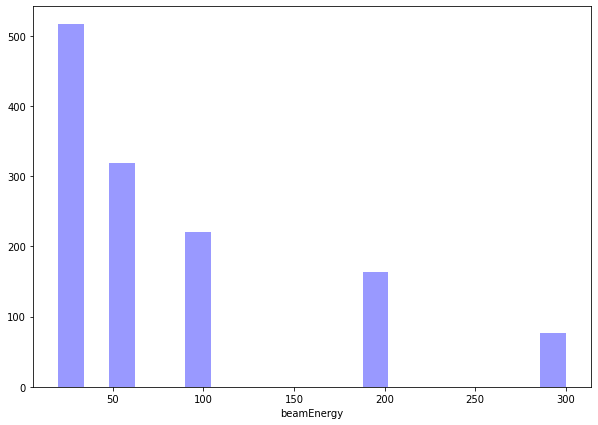

In [23]:
plt.figure(figsize=[10,7])
sns.distplot(pion_wrong_pred.beamEnergy, kde=False, color="b")

In [24]:
positron_data.drop(list(positron_data.loc[positron_data.rechit_energy_Hcal_by_Ecal>1000000].index), inplace = True)
positron_data

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
7856,7857,20.0,20.000000,259,"[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, ...","[1.9435272, 0.9717636, 1.9435272, 1.9435272, 0...","[0.0, -0.561048, 0.0, -1.122096, -0.561048, 0....","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[1, 1, 1, 2, 1, 1, 2, 1, 2, 5, 1, 2, 0, 1, 2, ...","[-2, -1, -2, -2, -1, -2, -2, -1, 0, -3, -2, -2...",...,0,0.000000,positron,"[2, 3, 3, 6, 9, 14, 17, 16, 20, 17, 20, 14, 17...","[5.48656964302063, 29.740489721298218, 51.1123...",2106.502839,0.000000,0.000000,1.963696,1.758681
18733,8833,50.0,49.990002,409,"[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[-0.9717636, -1.9435272, -1.9435272, 0.0, -0.9...","[2.80524, 3.366288, 2.244192, 2.244192, 2.8052...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[-3, -4, -3, -2, -3, -2, -4, -3, -5, 2, -3, -2...","[1, 2, 2, 0, 1, 1, 2, 2, 5, -2, 1, 1, 2, 2, 2,...",...,0,0.000000,positron,"[3, 7, 10, 10, 17, 23, 23, 32, 28, 29, 33, 33,...","[15.071453332901001, 62.02698111534119, 140.12...",5084.963494,2.555515,0.000503,2.239897,2.085230
61347,1942,200.0,197.320007,971,"[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...","[-0.9717636, -1.9435272, -1.9435272, -3.887054...","[1.683144, 2.244192, 1.122096, 2.244192, 0.0, ...","[13.8775, 13.8775, 13.8775, 13.8775, 14.7675, ...","[-2, -3, -2, -4, 0, 0, -2, -3, -2, -4, -3, -2,...","[1, 2, 2, 4, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1, ...",...,0,0.000000,positron,"[4, 7, 14, 17, 28, 29, 40, 43, 48, 46, 52, 52,...","[44.926788330078125, 86.39698994159698, 313.95...",20585.238521,14.592959,0.000709,2.477304,2.505007
30488,786,100.0,99.830002,670,"[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[0.0, -0.9717636, -0.9717636, 3.8870544, 0.0, ...","[2.244192, 2.80524, 1.683144, 4.488384, 0.0, 3...","[13.8775, 13.8775, 13.8775, 13.8775, 14.7675, ...","[-2, -3, -2, -2, 0, -3, -2, -1, -3, -2, -2, -5...","[0, 1, 1, -4, 0, 0, 0, 0, 1, 1, 2, 3, -1, -1, ...",...,1,1.528082,positron,"[4, 10, 13, 23, 28, 36, 35, 39, 40, 39, 46, 44...","[73.69589388370514, 207.96170350909233, 443.36...",10656.300024,45.785181,0.004297,2.354201,2.724499
59428,23,200.0,197.320007,836,"[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[-1.9435272, -2.9152908, -2.9152908, -2.915290...","[1.122096, 1.683144, 2.80524, 1.683144, 1.1220...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[-2, -3, -4, -3, -3, 3, -3, -3, -5, -4, -3, -1...","[2, 3, 3, 3, 4, -3, 1, 2, 3, 3, 3, 3, 4, 4, 4,...",...,0,0.000000,positron,"[2, 4, 10, 16, 21, 23, 27, 32, 38, 52, 38, 42,...","[11.792863726615906, 49.1063517332077, 172.163...",19121.844945,27.634539,0.001445,2.621135,2.482617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64678,5273,20.0,20.000000,243,"[1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, ...","[0.0, 0.9717636, 0.0, 0.0, 1.9435272, 0.971763...","[2.244192, 1.683144, 2.244192, 1.122096, 0.0, ...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[-2, -1, -2, -1, 1, -2, -1, -2, -1, -2, -2, 0,...","[0, -1, 0, 0, -2, -1, -1, 0, 0, 1, 3, -2, -1, ...",...,0,0.000000,positron,"[2, 5, 7, 5, 8, 16, 22, 13, 14, 21, 19, 19, 14...","[5.714633464813232, 38.73452568054199, 36.3505...",2062.123634,0.000000,0.000000,1.863298,1.962125
22574,2773,50.0,49.990002,492,"[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[-0.9717636, -0.9717636, -3.8870544, 0.0, 0.0,...","[-0.561048, 0.561048, -2.244192, 0.0, -1.12209...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[0, -1, 0, 0, 1, 0, -1, 4, -2, -1, 0, 1, -1, 0...","[1, 1, 4, 0, 0, 1, 1, 2, -2, -1, 0, 0, 0, 1, 1...",...,0,0.000000,positron,"[3, 7, 12, 12, 16, 18, 26, 29, 34, 32, 36, 32,...","[13.62235713005066, 52.56782001256943, 149.397...",5216.224516,6.416255,0.001230,2.258570,2.511202
4

In [25]:
pred_positron_data = model_D_T.predict(positron_data[[ "NRechits", "rechit_energy_Ecal", "rechit_energy_Hcal", "rechit_energy_Hcal_by_Ecal", "std_x", "std_y" ]].values)
positron_wrong_pred = positron_data.loc[pred_positron_data=="pion"]
positron_wrong_pred

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_nHits,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y
entry,,,,,,,,,,,,,,,,,,,,,
91300,2192,20.0,20.000000,119,"[3, 5, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10...","[-4.858818, -5.8305817, -4.858818, -5.8305817,...","[2.80524, 2.244192, 3.9273357, 2.244192, 3.366...","[16.7825, 19.6875, 20.5775, 20.5775, 22.6925, ...","[-5, -5, -6, -5, -5, -5, -5, -5, -3, -5, -4, -...","[5, 6, 5, 6, 4, 5, 6, 4, 4, 5, 2, 5, 6, 3, 4, ...",...,0,0.000000,positron,"[0, 0, 1, 0, 1, 2, 3, 3, 3, 6, 5, 3, 4, 4, 5, ...","[0.0, 0.0, 5.3679609298706055, 0.0, 1.44278287...",426.521116,25.919236,0.060769,3.608428,2.655529
57359,7855,300.0,287.179993,1256,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[-1.9435272, -1.9435272, -2.9152908, 2.9152908...","[1.122096, 0.0, -1.683144, -3.9273357, 0.0, 3....","[13.8775, 13.8775, 13.8775, 13.8775, 13.8775, ...","[-2, -1, 0, 5, 1, -3, 0, 2, -3, -1, 0, -1, 0, ...","[2, 2, 3, -3, -2, 0, 1, 1, 1, 1, 2, 2, 3, -2, ...",...,0,0.000000,positron,"[5, 9, 14, 20, 20, 36, 39, 41, 50, 57, 57, 49,...","[24.26934413611889, 129.51596415042877, 355.74...",28599.631138,139.720903,0.004885,3.031460,2.787265
66228,6823,200.0,197.320007,1008,"[1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, ...","[-1.9435272, -1.9435272, -3.8870544, 0.0, -1.9...","[2.244192, 1.122096, 1.122096, 3.366288, 2.244...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[-3, -2, -3, -3, -3, -2, -6, -1, 6, 0, -2, -1,...","[2, 2, 4, 0, 2, 2, 3, 5, -4, 1, 1, 1, 2, 2, 2,...",...,0,0.000000,positron,"[3, 6, 9, 12, 18, 21, 35, 32, 27, 30, 36, 37, ...","[15.236660718917847, 99.53365910053253, 132.19...",18990.058719,150.535713,0.007927,2.578166,2.856214
42742,3139,300.0,287.179993,1108,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[0.0, 0.0, -0.9717636, -0.9717636, -1.9435272,...","[4.488384, 3.366288, 2.80524, 1.683144, 2.2441...","[13.8775, 13.8775, 13.8775, 13.8775, 13.8775, ...","[-4, -3, -3, -2, -3, -4, -3, -4, -3, -5, -4, -...","[0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 4, -1, 0, 0,...",...,308,812.517456,positron,"[5, 8, 19, 21, 30, 40, 46, 43, 61, 56, 56, 64,...","[59.99411368370056, 122.74701374769211, 389.97...",21787.079056,713.555214,0.032751,4.141648,2.737258
44810,5207,100.0,99.830002,678,"[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[-0.9717636, -0.9717636, -1.9435272, -1.943527...","[-0.561048, 0.561048, -1.122096, 1.122096, 0.0...","[13.8775, 13.8775, 13.8775, 13.8775, 14.7675, ...","[0, -1, 0, -2, 0, 0, -1, 0, 1, 3, -1, -1, -2, ...","[1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 3, -3, 1, 1,...",...,0,0.000000,positron,"[4, 9, 12, 20, 33, 33, 35, 44, 41, 46, 40, 47,...","[34.56604814529419, 151.55686490237713, 337.51...",9883.506444,49.598009,0.005018,2.460163,2.739957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54515,5011,20.0,20.000000,217,"[1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, ...","[-2.9152908, -0.9717636, -2.9152908, -1.943527...","[-0.561048, -1.683144, -0.561048, -1.122096, 0...","[13.8775, 14.7675, 14.7675, 16.7825, 16.7825, ...","[-1, 1, -1, 0, -2, -1, -2, -1, 0, -1, -2, -1, ...","[3, 1, 3, 2, 3, 3, 4, 4, 2, 2, 3, 3, 4, 5, 2, ...",...,0,0.000000,positron,"[1, 2, 5, 6, 6, 9, 7, 14, 12, 17, 17, 18, 14, ...","[4.626619815826416, 28.030689239501953, 50.731...",1623.146760,34.566020,0.021296,2.301005,1.944267
45432,5829,20.0,20.000000,146,"[6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, ...","[3.8870544, 3.8870544, 6.8023453, 4.858818, 1....","[1.122096, 3.366288, 0.561048, 1.683144, 2.244...","[20.5775, 20.5775, 20.5775, 22.6925, 22.6925, ...","[1, -1, 3, 1, -1, 3, 1, 0, 2, 0, 4, 2, 4, 0, 0...","[-4, -4, -7, -5, -2, -7, -6, 0, -6, -5, -7, -6...",...,0,0.000000,positron,"[0, 0, 0, 0, 0, 3, 4, 4, 4, 2, 8, 4, 8, 4, 6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 11.181917667388916, ...",387.206863,76.485777,0.197532,4

In [26]:
n_wrong_positron = positron_wrong_pred.beamEnergy.size
n_wrong_pion = pion_wrong_pred.beamEnergy.size

In [27]:
x = [20, 50, 100, 200, 300]
y=[]
for i in x:
    y.append((positron_wrong_pred.loc[positron_wrong_pred.beamEnergy==i]).event.count()/positron_data.loc[positron_data.beamEnergy==i].event.count()*100)
y

[1.4800436734198714,
 0.5266839484837262,
 0.21222587491157252,
 0.36289500509684,
 0.388457269700333]

In [80]:
c=ROOT.TCanvas()

H_pion_wrong_pred = ROOT.TH1F("H_pion_wrong_pred","Positrons predicted as Pion;Energy (GeV); % of wrong prediction",35,5,355)

for i in range(5):
    H_pion_wrong_pred.SetBinContent(int(x[i]/10),y[i])
    
H_pion_wrong_pred.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_wrong_pred (Potential memory leak).


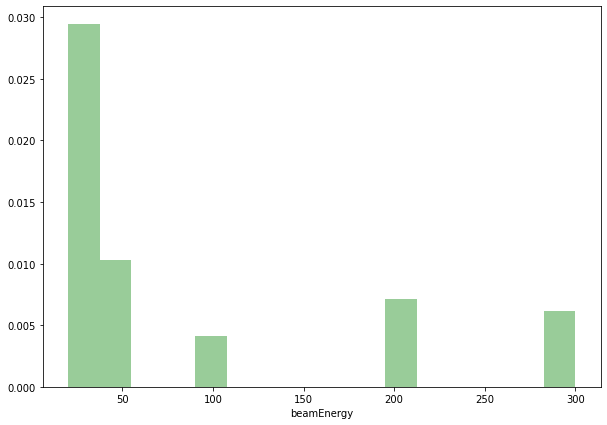

In [29]:
plt.figure(figsize=[10,7])
sns.distplot(positron_wrong_pred.beamEnergy, kde=False, color="g", norm_hist=True)

In [30]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_HCAL/Energy_ECAL for wrong prdictions; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, 0.2)
H_positron = ROOT.TH1F("H_positron","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -0.02, 0.2)

positron_wrong_pred_Hcal_Ecal = positron_wrong_pred.rechit_energy_Hcal_by_Ecal.values
pion_wrong_pred_Hcal_Ecal = pion_wrong_pred.rechit_energy_Hcal_by_Ecal.values

for i in range(n_wrong_pion):
    H_pion.Fill(pion_wrong_pred_Hcal_Ecal[i])
    
for i in range(n_wrong_positron):
    H_positron.Fill(positron_wrong_pred_Hcal_Ecal[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)


H_pion.DrawNormalized()
H_positron.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion ","h");
legend.AddEntry("H_positron","Positron ","h");
legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

In [31]:
def shower_start_updated(df):
        
    l=0
    for i in range(40):
        if (i==0) and (df.rechit_energy_layer[i]>20):
            l=1
            break
        elif (i==1) and (df.rechit_energy_layer[1]>20 and df.rechit_energy_layer[1]>2*df.rechit_energy_layer[0]):
            l=2
            break
        elif (i>1) and ((df.rechit_energy_layer[i]>20) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-1]) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-2])):
            l=i+1
            break
    
    return l

In [32]:
positron_wrong_shower_start = positron_wrong_pred.apply(shower_start_updated, axis=1).values

In [33]:
pion_wrong_shower_start = pion_wrong_pred.apply(shower_start_updated, axis=1).values

In [34]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Pion Shower Start Location for Wrong Prediction; Shower Start Location (layer number); Number of Entries",50, -.02, 40)

for i in range(n_wrong_pion):
    H_pion.Fill(pion_wrong_shower_start[i])
    

H_pion.SetLineColor(4)

H_pion.Draw()


c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [35]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Shower Start Location for Wrong Prdiction; Energy_HCAL/Shower Start Location (layer number); Normalized Entries",50, -.02, 40)
H_positron = ROOT.TH1F("H_positron","Shower Start Location for Wrong Prdiction; Energy_HCAL/Shower Start Location (layer number); Normalized Entries",50, -.02, 40)

positron_wrong_pred_Hcal_Ecal = positron_wrong_pred.rechit_energy_Hcal_by_Ecal.values
pion_wrong_pred_Hcal_Ecal = pion_wrong_pred.rechit_energy_Hcal_by_Ecal.values

for i in range(n_wrong_pion):
    H_pion.Fill(pion_wrong_shower_start[i])
    
for i in range(n_wrong_positron):
    H_positron.Fill(positron_wrong_shower_start[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)


H_positron.DrawNormalized()
H_pion.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion ","h");
legend.AddEntry("H_positron","Positron ","h");
legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [36]:
l = [3,4,6,230]

xx_pion1=pion_wrong_pred.rechit_x.values[l[0]]
yy_pion1=pion_wrong_pred.rechit_y.values[l[0]]
zz_pion1=pion_wrong_pred.rechit_z.values[l[0]]

xx_pion2=pion_wrong_pred.rechit_x.values[l[1]]
yy_pion2=pion_wrong_pred.rechit_y.values[l[1]]
zz_pion2=pion_wrong_pred.rechit_z.values[l[1]]

xx_pion3=pion_wrong_pred.rechit_x.values[l[2]]
yy_pion3=pion_wrong_pred.rechit_y.values[l[2]]
zz_pion3=pion_wrong_pred.rechit_z.values[l[2]]

xx_pion4=pion_wrong_pred.rechit_x.values[l[3]]
yy_pion4=pion_wrong_pred.rechit_y.values[l[3]]
zz_pion4=pion_wrong_pred.rechit_z.values[l[3]]

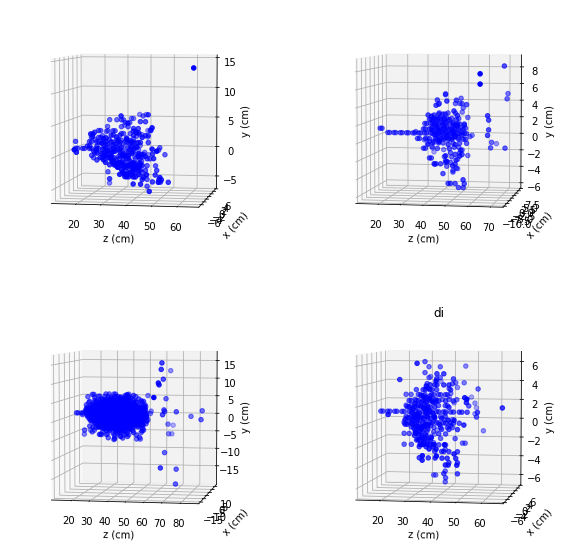

In [37]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion1, xx_pion1, yy_pion1, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion2, xx_pion2, yy_pion2, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion3, xx_pion3, yy_pion3, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion4, xx_pion4, yy_pion4, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [38]:
l = [3,4,6,230]

xx_positron1=positron_wrong_pred.rechit_x.values[l[0]]
yy_positron1=positron_wrong_pred.rechit_y.values[l[0]]
zz_positron1=positron_wrong_pred.rechit_z.values[l[0]]

xx_positron2=positron_wrong_pred.rechit_x.values[l[1]]
yy_positron2=positron_wrong_pred.rechit_y.values[l[1]]
zz_positron2=positron_wrong_pred.rechit_z.values[l[1]]

xx_positron3=positron_wrong_pred.rechit_x.values[l[2]]
yy_positron3=positron_wrong_pred.rechit_y.values[l[2]]
zz_positron3=positron_wrong_pred.rechit_z.values[l[2]]

xx_positron4=positron_wrong_pred.rechit_x.values[l[3]]
yy_positron4=positron_wrong_pred.rechit_y.values[l[3]]
zz_positron4=positron_wrong_pred.rechit_z.values[l[3]]

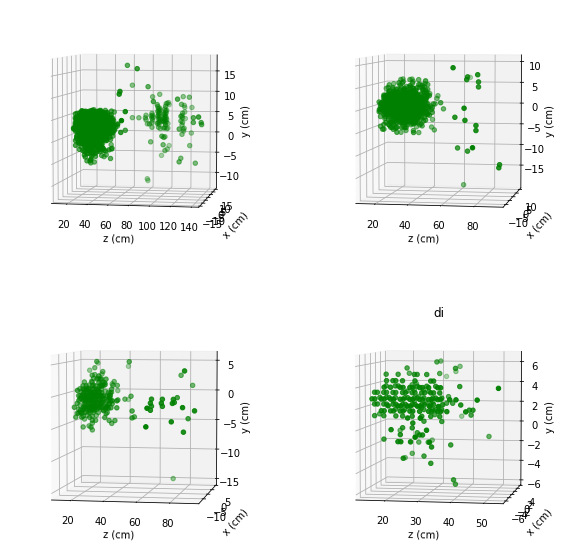

In [39]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron1, xx_positron1, yy_positron1, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron2, xx_positron2, yy_positron2, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron3, xx_positron3, yy_positron3, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron4, xx_positron4, yy_positron4, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [40]:
filename = 'DT_combined_energies.sav'
#pickle.dump(model_D_T, open(filename, 'wb'))

In [41]:
model_D_T = pickle.load(open(filename, 'rb'))

In [42]:
yp_train=model_D_T.predict(X_train)
yp_dev=model_D_T.predict(X_dev)
yp_test=model_D_T.predict(X_test)
print("Accuracy of Train set = ", metrics.accuracy_score(y_train,yp_train)*100)
print("Accuracy of Dev set = ", metrics.accuracy_score(y_dev,yp_dev)*100)
print("Accuracy of Test set = ", metrics.accuracy_score(y_test,yp_test)*100)

Accuracy of Train set =  99.16384007185657
Accuracy of Dev set =  99.20855968893913
Accuracy of Test set =  99.16443758100544


In [43]:
98.919-99.27966

-0.36066000000001

In [112]:
pion_wrong_pred_20 = pion_wrong_pred.loc[pion_wrong_pred.beamEnergy==20]
pion_wrong_pred_300 = pion_wrong_pred.loc[pion_wrong_pred.beamEnergy==300]
pion_wrong_pred_20["shower_start_layer"] =  pion_wrong_pred_20.apply(shower_start_updated, axis=1)
pion_wrong_pred_300["shower_start_layer"] =  pion_wrong_pred_300.apply(shower_start_updated, axis=1)
pion_wrong_pred_20

<ipython-input-112-cc0bd27304dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pion_wrong_pred_20["shower_start_layer"] =  pion_wrong_pred_20.apply(shower_start_updated, axis=1)
<ipython-input-112-cc0bd27304dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pion_wrong_pred_300["shower_start_layer"] =  pion_wrong_pred_300.apply(shower_start_updated, axis=1)


,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,shower_start_layer
entry,,,,,,,,,,,,,,,,,,,,,
41006,1205,20.0,19.843960,229,"[1, 2, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-1, -1, -1, -1, -1, 2, -4, -2, -1, 1, -3, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, -1, -1, 0,...",...,0.0,pion,"[1, 1, 1, 1, 1, 8, 4, 4, 13, 13, 17, 19, 17, 1...","[0.8304556012153625, 1.1631643772125244, 0.808...",1855.526184,14.903399,0.008032,1.816172,2.107856,6
43056,3255,20.0,20.020710,301,"[1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, ...","[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[1.683144, 0.561048, 0.561048, 0.561048, 0.561...","[13.8775, 13.8775, 14.7675, 16.7825, 17.6725, ...","[-2, -1, -1, -1, -1, -3, -4, -2, -2, -1, -2, 0...","[1, 1, 1, 1, 1, 5, 6, 0, 1, 1, 2, 0, 0, 1, 1, ...",...,0.0,pion,"[2, 1, 1, 3, 4, 7, 11, 10, 10, 13, 17, 18, 17,...","[4.669512748718262, 3.1607491970062256, 0.7373...",2133.763617,3.881884,0.001819,2.400765,2.548460,5
75410,15708,20.0,19.947739,238,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13...","[-1.9435272, -1.9435272, -0.9717636, -0.971763...","[1.122096, 1.122096, 0.561048, 0.561048, 0.561...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 2,...",...,0.0,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 8, ...","[1.1708688735961914, 1.1481600999832153, 1.660...",1853.937138,19.841019,0.010702,2.334185,2.214624,10
50655,10854,20.0,19.886372,268,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, ...","[0.0, -0.9717636, 0.0, -0.9717636, 0.0, -0.971...","[1.122096, 0.561048, 1.122096, 0.561048, 1.122...","[13.8775, 13.8775, 14.7675, 14.7675, 16.7825, ...","[-1, -1, -1, -1, -1, -1, 0, -1, 0, -1, 0, -1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",...,0.0,pion,"[2, 2, 2, 2, 2, 2, 3, 3, 7, 9, 11, 14, 16, 16,...","[4.549523830413818, 2.8901665806770325, 3.2315...",1812.460432,36.609661,0.020199,2.178836,2.955900,8
93654,14051,20.0,19.897657,237,"[1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, ...","[0.0, -4.858818, 0.9717636, 0.0, 0.9717636, 0....","[0.0, 0.561048, 2.80524, 0.0, -0.561048, 0.0, ...","[13.8775, 13.8775, 13.8775, 14.7675, 14.7675, ...","[0, -3, -2, 0, 1, 0, 3, 0, 0, 1, 4, 3, 0, 2, 0...","[0, 5, -1, 0, -1, 0, -3, -1, 0, 0, -3, -2, 0, ...",...,0.0,pion,"[3, 2, 3, 4, 6, 6, 8, 13, 19, 16, 22, 14, 18, ...","[95.46407550573349, 2.9258338809013367, 19.975...",1819.835359,0.000000,0.000000,1.934579,1.942154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92817,13214,20.0,20.001696,247,"[1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 6, 6, ...","[0.0, 0.0, -3.8870544, -4.858818, 0.0, -3.8870...","[1.122096, 1.122096, 4.488384, 2.80524, 1.1220...","[13.8775, 14.7675, 14.7675, 14.7675, 16.7825, ...","[-1, -1, -6, -5, -1, -4, 1, -1, -2, -3, -2, -2...","[0, 0, 4, 5, 0, 4, -1, 0, 1, 2, 3, 4, 0, 0, 0,...",...,0.0,pion,"[1, 3, 3, 5, 1, 4, 6, 9, 14, 18, 16, 15, 17, 1...","[3.598773956298828, 3.197787284851074, 13.6064...",1773.869326,61.319367,0.034568,1.987198,2.122251,4
3531,3532,20.0,18.813116,319,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","[0.0, -0.9717636, -0.9717636, -1.9435272, -1.9...","[1.122096, 2.80524, 1.683144, 1.122096, 0.0, 2...","[13.8775, 13.8775, 13.8775, 13.8775, 13.8775, ...","[-1, -3, -2, -2, -1, -4, -3, -1, 2, -1, 0, -1,...","[0, 1, 1, 2, 2, 3, 3, 3, -4, -4, -1, 0, 1, 1, ...",...,0.0,pion,"[11, 15, 21, 16, 23, 23, 21, 16, 19, 19, 18, 1...","[26.903545424342155, 102.89511847496033, 106.1...",2136.265303,0.000000,0.000000,2.263672,2.030408,1
69317,9615,20.0,19.930122,227,"[1, 1, 1, 2, 2, 2, 2, 2

In [116]:
pion_20_wrong_shower_start = pion_wrong_pred_20.apply(shower_start_updated, axis=1).values
pion_300_wrong_shower_start = pion_wrong_pred_300.apply(shower_start_updated, axis=1).values

c1 = ROOT.TCanvas()
H_pion_20 = ROOT.TH1F("H_pion_20","Pion Shower Start Location for Wrong Prediction; Shower Start Location (layer number); Normalized Entries",50, -.02, 40)
H_pion_300 = ROOT.TH1F("H_pion_300","Pion Shower Start Location for Wrong Prediction; Shower Start Location (layer number); Normalized Entries",50, -.02, 40)



for i in range(pion_wrong_pred_20.event.count()):
    H_pion_20.Fill(pion_20_wrong_shower_start[i])
    
for i in range(pion_wrong_pred_300.event.count()):
    H_pion_300.Fill(pion_300_wrong_shower_start[i])
    

H_pion_20.SetLineColor(2)
H_pion_300.SetLineColor(4)


H_pion_300.DrawNormalized()
H_pion_20.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion_20","Pion (20 GeV)","h");
legend.AddEntry("H_pion_300","Pion (300 GeV)","h");

legend.Draw();

c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_300 (Potential memory leak).


In [46]:
l = [3,456,100,230]

xx_pion1=pion_wrong_pred_20.rechit_x.values[l[0]]
yy_pion1=pion_wrong_pred_20.rechit_y.values[l[0]]
zz_pion1=pion_wrong_pred_20.rechit_z.values[l[0]]

xx_pion2=pion_wrong_pred_20.rechit_x.values[l[1]]
yy_pion2=pion_wrong_pred_20.rechit_y.values[l[1]]
zz_pion2=pion_wrong_pred_20.rechit_z.values[l[1]]

xx_pion3=pion_wrong_pred_20.rechit_x.values[l[2]]
yy_pion3=pion_wrong_pred_20.rechit_y.values[l[2]]
zz_pion3=pion_wrong_pred_20.rechit_z.values[l[2]]

xx_pion4=pion_wrong_pred_20.rechit_x.values[l[3]]
yy_pion4=pion_wrong_pred_20.rechit_y.values[l[3]]
zz_pion4=pion_wrong_pred_20.rechit_z.values[l[3]]

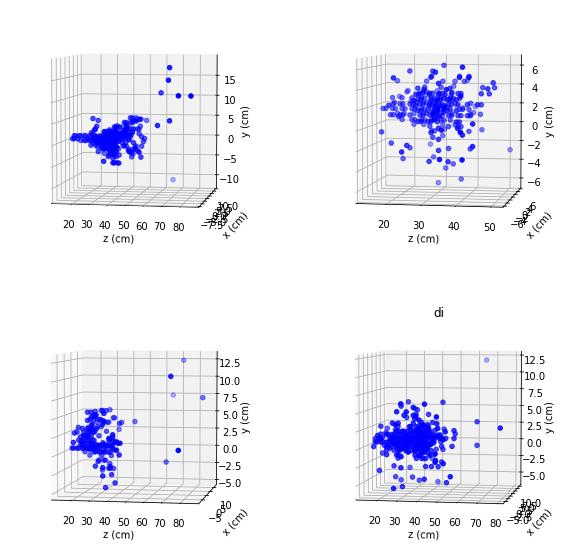

In [47]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion1, xx_pion1, yy_pion1, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion2, xx_pion2, yy_pion2, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion3, xx_pion3, yy_pion3, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion4, xx_pion4, yy_pion4, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [48]:
l = [3,456,100,230]

pion_a=pion_wrong_pred_20.rechit_energy_layer.values[l[0]]

pion_b=pion_wrong_pred_20.rechit_energy_layer.values[l[1]]

pion_c=pion_wrong_pred_20.rechit_energy_layer.values[l[2]]

pion_d=pion_wrong_pred_20.rechit_energy_layer.values[l[3]]


In [49]:
c1= ROOT.TCanvas("c1","20 GeV Incident Pion in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

In [50]:
l = [3,1,4,2]

pion_wrong_pred_20_shower_gr_15 = pion_wrong_pred_20.loc[pion_wrong_pred_20.shower_start_layer>16]

pion_a=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[0]]

pion_b=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[1]]

pion_c=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[2]]

pion_d=pion_wrong_pred_20_shower_gr_15.rechit_energy_layer.values[l[3]]


c1= ROOT.TCanvas("c1","20 GeV Incident Pion in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


In [52]:
#pion_data["shower_start_location"] = pion_data.apply(shower_start_updated, axis=1)
pion_data_300gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==16) & (pion_data.beamEnergy==300)]
pion_data_300gev_shower_layer_16

,event,beamEnergy,trueBeamEnergy,NRechits,rechit_layer,rechit_x,rechit_y,rechit_z,rechit_iu,rechit_iv,...,ahc_energySum,particle,num_hits_layer,rechit_energy_layer,rechit_energy_Ecal,rechit_energy_Hcal,rechit_energy_Hcal_by_Ecal,std_x,std_y,shower_start_location
entry,,,,,,,,,,,,,,,,,,,,,
84742,5139,300.0,298.418182,972,"[1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 8, ...","[-2.9152908, -2.9152908, -1.9435272, -2.915290...","[1.683144, 1.683144, 2.244192, 1.683144, 3.927...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[-3, -3, -3, -3, -5, -3, -2, -2, -3, -2, -3, -...","[3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, ...",...,1908.926147,pion,"[1, 1, 2, 3, 3, 3, 1, 2, 4, 2, 1, 2, 1, 4, 2, ...","[1.4218486547470093, 2.9188461303710938, 12.60...",7643.557487,1938.628252,0.253629,4.560118,4.207542,16
7389,7390,300.0,298.476654,973,"[1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 9, 10, 10, 11, ...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 2, 4,...","[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, -5, 1, 1, 1, 0,...",...,2731.696533,pion,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 4, 3, ...","[0.9985888600349426, 1.6423730850219727, 0.788...",9925.628184,2277.567530,0.229463,3.545206,3.921329,16
18088,18089,300.0,296.881958,235,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",...,7431.262207,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0278940200805664, 1.1463067531585693, 0.872...",210.931169,1376.373141,6.525224,2.913058,2.660703,16
87464,7861,300.0,301.583313,1142,"[1, 2, 3, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12, ...","[-0.9717636, -0.9717636, -0.9717636, -1.943527...","[0.561048, 0.561048, 0.561048, 0.0, 0.561048, ...","[13.8775, 14.7675, 16.7825, 16.7825, 17.6725, ...","[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1...","[1, 1, 1, 2, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1...",...,59.437004,pion,"[1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, ...","[1.7889834642410278, 1.8718647956848145, 6.443...",8937.601431,2239.438416,0.250564,4.747590,4.661357,16
53999,14198,300.0,299.236267,1006,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, ...",...,1787.800537,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 5, ...","[1.450170636177063, 1.039630651473999, 1.93841...",2446.244290,3242.023737,1.325307,4.667486,4.427357,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33111,13211,300.0,303.121521,1030,"[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, ...","[-0.9717636, -1.9435272, 0.0, 0.0, -0.9717636,...","[-0.561048, 0.0, -1.122096, -2.244192, -0.5610...","[13.8775, 13.8775, 14.7675, 14.7675, 14.7675, ...","[0, -1, 1, 2, 0, -1, 0, 0, -1, 2, 0, -1, 1, 0,...","[1, 2, 0, 0, 1, -2, 1, 2, 2, -2, 1, 2, 0, 1, 1...",...,1547.918579,pion,"[2, 4, 4, 2, 6, 5, 4, 2, 3, 4, 4, 2, 2, 3, 4, ...","[2.7131271958351135, 11.489773511886597, 14.03...",2263.337536,4000.780281,1.767646,4.372862,4.651979,16
1570,1571,300.0,298.088898,1121,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13...","[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...","[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, ...","[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2,...",...,947.329590,pion,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1.3390668630599976, 0.9886475801467896, 1.005...",9396.216418,26

In [53]:
l = [36,132,454,2]



pion_a=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[0]]

pion_b=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[1]]

pion_c=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[2]]

pion_d=pion_data_300gev_shower_layer_16.rechit_energy_layer.values[l[3]]


c1= ROOT.TCanvas("c1","20 GeV Incident Pion in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


In [110]:
n=16

pion_data_20gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==20)]
pion_data_50gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==50)]
pion_data_100gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==100)]
pion_data_200gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==200)]
pion_data_300gev_shower_layer_16 = pion_data.loc[(pion_data.shower_start_location==n) & (pion_data.beamEnergy==300)]

In [111]:
c1 = ROOT.TCanvas()
H_pion_20 = ROOT.TH1F("H_pion_20","Energy_HCAL/Energy_ECAL for shower starting in 16 layer; Energy_HCAL/Energy_ECAL; Normalized Entries",50, -.02, 1)
#H_pion_50 = ROOT.TH1F("H_pion_50","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, 1)
H_pion_100 = ROOT.TH1F("H_pion_100","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",50, -.02, .5)
#H_pion_200 = ROOT.TH1F("H_pion_200","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, .009)
H_pion_300 = ROOT.TH1F("H_pion_300","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",50, -.02, 1)

pion_wrong_pred_Hcal_Ecal_20 = pion_data_20gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
#pion_wrong_pred_Hcal_Ecal_50 = pion_data_50gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
#pion_wrong_pred_Hcal_Ecal_100 = pion_data_100gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
#pion_wrong_pred_Hcal_Ecal_200 = pion_data_200gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values
pion_wrong_pred_Hcal_Ecal_300 = pion_data_300gev_shower_layer_16.rechit_energy_Hcal_by_Ecal.values

for i in range(pion_wrong_pred_Hcal_Ecal_20.size):
    H_pion_20.Fill(pion_wrong_pred_Hcal_Ecal_20[i])
    
#for i in range(pion_wrong_pred_Hcal_Ecal_50.size):
#    H_pion_50.Fill(pion_wrong_pred_Hcal_Ecal_50[i])
    
#for i in range(pion_wrong_pred_Hcal_Ecal_100.size):
#    H_pion_100.Fill(pion_wrong_pred_Hcal_Ecal_100[i])
    
#for i in range(pion_wrong_pred_Hcal_Ecal_200.size):
#    H_pion_200.Fill(pion_wrong_pred_Hcal_Ecal_200[i])
    
for i in range(pion_wrong_pred_Hcal_Ecal_300.size):
    H_pion_300.Fill(pion_wrong_pred_Hcal_Ecal_300[i])

H_pion_20.SetLineColor(2)
#H_pion_50.SetLineColor(2)
#H_pion_100.SetLineColor(3)
#H_pion_200.SetLineColor(4)
H_pion_300.SetLineColor(4)


#H_pion_20.SetFillColor(2)
#H_pion_100.SetFillColor(3)
#H_pion_300.SetFillColor(5)


H_pion_20.DrawNormalized()
#H_pion_50.DrawNormalized("same")
#H_pion_100.DrawNormalized("same")
#H_pion_200.DrawNormalized("same")
H_pion_300.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion_20","Pion (20 GeV)","h");
#legend.AddEntry("H_pion_50","Pion (50 GeV)","h");
#legend.AddEntry("H_pion_100","Pion (100 GeV)","h");
#legend.AddEntry("H_pion_200","Pion (200 GeV)","h");
legend.AddEntry("H_pion_300","Pion (300 GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_100 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion_300 (Potential memory leak).


In [107]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH2D("h2","Pion (20Gev); Ecal_Energy (MIPS); Hcal_Energy (MIPS)",100, 0.0, 6000,100, 0, 1500)

pion_total_E_deposit_Ecal_20 = pion_data_20gev_shower_layer_16.rechit_energy_Ecal.values
pion_total_E_deposit_Hcal_20 = pion_data_20gev_shower_layer_16.rechit_energy_Hcal.values

for i in range(470):
    H_pion.Fill(pion_total_E_deposit_Ecal_20[i], pion_total_E_deposit_Hcal_20[i])
    
H_pion.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [109]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH2D("h2","Pion (300Gev); Ecal_Energy (MIPS); Hcal_Energy (MIPS)",100, 0.0, 12000,100, 0, 9500)

pion_total_E_deposit_Ecal_20 = pion_data_300gev_shower_layer_16.rechit_energy_Ecal.values
pion_total_E_deposit_Hcal_20 = pion_data_300gev_shower_layer_16.rechit_energy_Hcal.values

for i in range(431):
    H_pion.Fill(pion_total_E_deposit_Ecal_20[i], pion_total_E_deposit_Hcal_20[i])
    
H_pion.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
